### Linear Regression (단항 회귀)
- 알려진 데이터 값을 사용하여 알 수 없는 데이터의 값을 예측하는 데이터 분석 기법이다.
- 독립변수는 여러개가 될 수 있고 종속변수는 하나만 올 수 있다.
> 예시
> - 공부시간(독립변수)에 따른 시험점수(종속변수)
> - 기온과 요일(독립변수)에 따른 해수욕장 인원(종속변수)
> - 역에서의 거리, 조망, 범죄율(독립변수)에 따른 부동산시세(종속변수)

##### LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
- fit_intercept: 절편을 계산할 것인지의 여부를 지정한다.
- normalize: 회귀를 수행하기 전 입력 데이터 세트를 정규화할 지의 여부를 지정한다.

---

### LinearRegression 객체의 필드
##### coef_: 기울기(가중치)
> - model.coef_를 통해 설명변수 X를 구성하는 각 특성별 가중치를 확인
> - 특정 컬럼에 대한 가중치 값이 0이라면 결과에 영향을 주지않는 특성임
> - 특정 컬럼에 대한 가중치 값의 절대값이 높을수록 영향력이 큰 특성임

##### intercept_: 절편(상수)

##### score: 결정 계수 (R<sup>2</sup>)
> - 대상을 얼마나 잘 설명할 수 있는가를 숫자로 나타낸 것이다.
> - 결정계수는 음의 값부터 1까지의 범위를 가지는 평가 값
> - 결정계수 값이 음수인 경우 : 모델이 평균 정도도 예측하지 못함을 의미 (학습 부족)
> - 결정계수 값이 0인 경우 : 모델이 평균 정도로만 예측함을 의미 (학습 부족)
> - 결정계수 값이 1인 경우 : 모델이 실제 정답과 완벽하게 동일하게 예측함을 의미 (과대적합)
> - 결정계수값은 0.7 ~ 0.8을 목표치로 설정한다.

##### 1인당 건강 보험 비용
- age: 1차 수혜자의 연령.
- sex: 보험계약자의 성별(여성 또는 남성).
- bmi: 체질량지수, 키 대비 체중을 측정하는 척도.
- children: 건강보험의 적용을 받는 자녀의 수 또는 부양가족의 수.
- smoker: 흡연 상태(흡연자 또는 비흡연자).
- region: 수혜자의 미국 내 거주지역(북동, 남동, 남서, 북서).
- charges: 건강보험에서 청구하는 개인별 의료비.

In [123]:
import pandas as pd
medical_cost_df = pd.read_csv("./datasets/medical_cost.csv")
medical_cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [124]:
medical_cost_df.shape

(1338, 7)

In [125]:
medical_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
medical_cost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [127]:
medical_cost_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
medical_cost_df.duplicated().sum()

1

In [129]:
medical_cost_df = medical_cost_df.drop_duplicates().reset_index(drop=True)
medical_cost_df.duplicated().sum()

0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

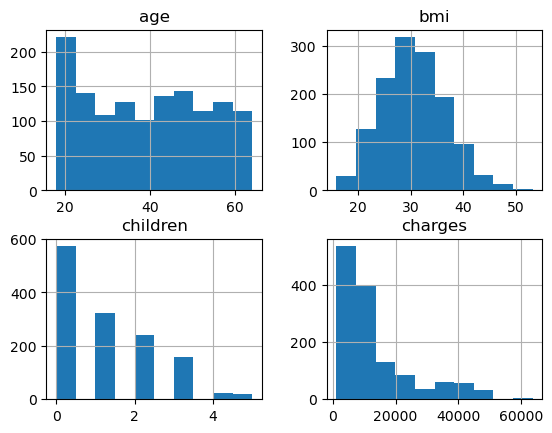

In [130]:
medical_cost_df.hist()

<Axes: >

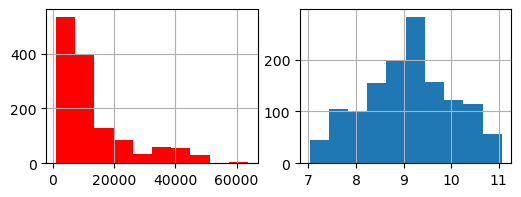

In [131]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(6, 2))
medical_cost_df.charges.hist(ax=axes[0], color='red')
np.log1p(medical_cost_df.charges).hist(ax=axes[1])

<Axes: xlabel='region', ylabel='charges'>

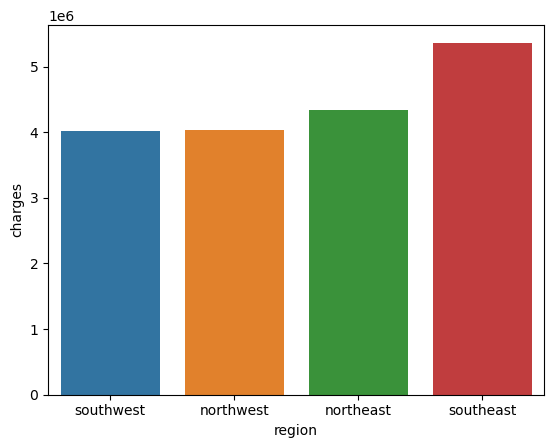

In [132]:
import seaborn as sns
charges = medical_cost_df['charges'].groupby(medical_cost_df.region).sum().sort_values(ascending=True)
charges = charges.reset_index()
sns.barplot(x='region', y='charges', data=charges)

<Axes: xlabel='region', ylabel='charges'>

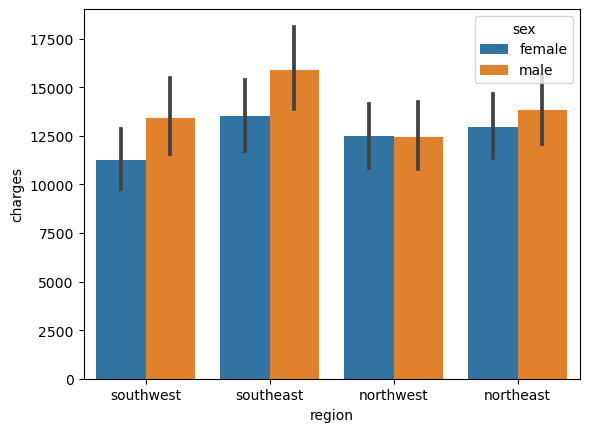

In [133]:
sns.barplot(x='region', y='charges', hue='sex', data=medical_cost_df)

<Axes: xlabel='region', ylabel='charges'>

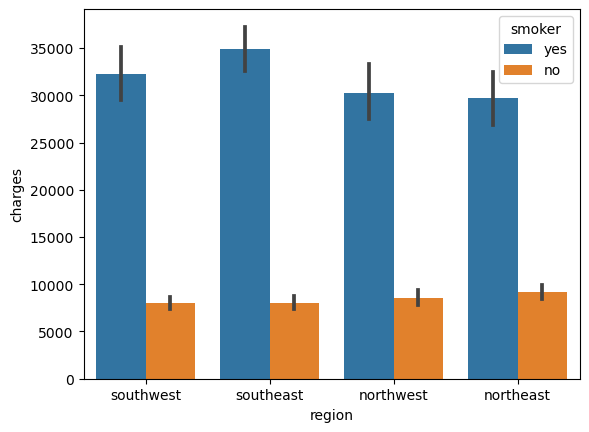

In [134]:
sns.barplot(x = 'region', y = 'charges', hue='smoker', data=medical_cost_df)

<Axes: xlabel='region', ylabel='charges'>

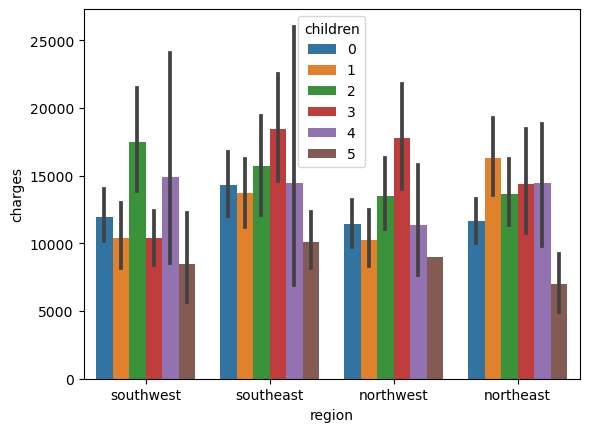

In [135]:
sns.barplot(x='region', y='charges', hue='children', data=medical_cost_df)

#### 🚩결론
남동부는 흡연자에 대해 건강보험료가 가장 높고 가장 낮은 곳은 북동부이다. 북동부 사람들이 남서부 사람들이 보다 덜 흡연하지만, 남서부와 북서부 사람들보다 성별에 따른 요금이 더 높다. 그리고 아이가 5명 이상인 사람들은 전반적으로 의료비가 더 낮은 경향이 있다.

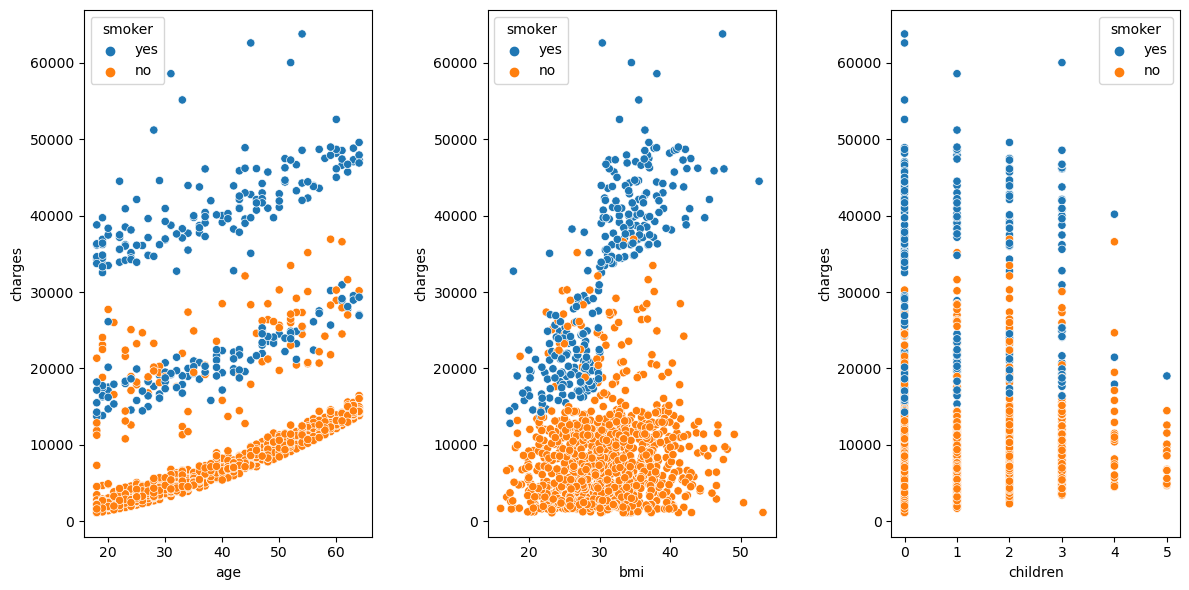

In [136]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
sns.scatterplot(x = 'age', y = 'charges', data=medical_cost_df, hue='smoker', ax=axes[0])
sns.scatterplot(x = 'bmi', y = 'charges', data=medical_cost_df, hue='smoker', ax=axes[1])
sns.scatterplot(x = 'children', y = 'charges', data=medical_cost_df, hue='smoker', ax=axes[2])
plt.tight_layout(h_pad=0, w_pad=3)

##### 🚩 결론
나이, 체질량, 아이들의 수가 증가함에도 불구하고 흡연 여부가 의료비에 가장 높은 영향을 끼친다. 또한 아이가 있는 사람들은 일반적으로 담배를 덜 피운다.

In [137]:
from sklearn.preprocessing import LabelEncoder

columns = ['sex', 'smoker', 'region']
encoders = []

for column in columns:
    encode = LabelEncoder()
    encoded_feature = encode.fit_transform(medical_cost_df[column])
    medical_cost_df[column] = encoded_feature
    encoders.append(encode)
    print(encode.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


In [138]:
medical_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


##### 종속변수 y(타겟 데이터)를 정규분포화 하기 위해 로그로 변환하여 학습시킨다.

In [139]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features, targets = medical_cost_df.iloc[:, :-1], medical_cost_df.charges

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

y_train = np.log1p(y_train)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# 기울기(가중치)
print(linear_regression.coef_)
# 절편(상수)
print(linear_regression.intercept_)

[ 0.03495623 -0.06900672  0.01375155  0.09996102  1.53884789 -0.04669985]
6.985428873023277


In [140]:
medical_cost_df.columns[linear_regression.coef_.argsort()[::-1]]

Index(['smoker', 'children', 'age', 'bmi', 'region', 'sex'], dtype='object')

##### 예측 값은 로그 값이기 때문에 클라이언트에게는 원래 값으로 변경하여 보여줘야 한다.
- 지수로 변환하면 원래 값의 근사값(거의 동일)으로 돌아간다.

In [141]:
np.expm1(linear_regression.predict(X_test))

array([ 3381.71205746, 19810.88458183,  3052.06188016, 11233.31997854,
        3113.07883921, 11575.72253806, 16734.55832663,  5842.009333  ,
       13698.77778352,  5613.16266886, 47902.64770217,  2330.5190857 ,
        5652.76279458, 12297.11738984,  8700.41968256,  8814.10179472,
       12105.4660897 ,  5533.30923158,  3952.30019671,  9015.52101332,
        9670.32402786,  8576.00719577,  5317.24458456,  5227.60539757,
        9462.96216589, 14058.90309781, 11168.05210347, 11185.53433495,
        4651.91267242,  9131.06722839,  3322.41681283,  6752.12321277,
       14698.10415194, 25344.08984139,  6511.00987706, 11625.9320927 ,
        9668.64401368,  6209.63152239,  7414.88148337, 51339.05055408,
        4652.29677799,  2475.90749948,  7987.09698126,  3060.76054461,
       10886.25577693,  3328.85890464,  8620.61995915,  4332.41392627,
        4776.65444023, 11369.93979958,  4084.59863631,  2639.54367845,
        7574.5728209 ,  3074.4484082 , 13687.09167942, 38225.10494322,
      

##### R2-Score
- 로그 값으로 변환하여 훈련시켰다면, 그 분산에 맞춰 회귀선이 그어진다.
- 성능 평가 시, 실제 데이터로 변환(지수를 취함)하여 테스트하면 기존 회귀선의 기준인 분포와 달라지기 때문에  
(실제 데이터로 변환하면, 로그 값일 때보다 분산도가 더 높아짐) R2-Score가 더 낮게 나오게 된다.

In [142]:
# 문제(X_test)를 전달해서 예측한 값은 로그값이다.
prediction = linear_regression.predict(X_test)
# 실제 성능 평가를 할 때에도 정답(실제 값)도 로그로 변환해야 한다.
print(linear_regression.score(X_test, np.log1p(y_test)))
print(r2_score(np.log1p(y_test), prediction))


prediction = np.expm1(linear_regression.predict(X_test))
print(linear_regression.score(X_test, np.log1p(y_test)))
# 예측한 로그값을 지수로 변환하여 
print(r2_score(y_test, prediction))

0.7668311173999894
0.7668311173999894
0.7668311173999894
0.5302461736888766


##### 실제 데이터로 훈련했을 때(로그로 변환하지 않았을 때)

In [143]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features, targets = medical_cost_df.iloc[:, :-1], medical_cost_df.charges

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# y_train = np.log1p(y_train)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# 기울기(가중치)
print(linear_regression.coef_)
# 절편(상수)
print(linear_regression.intercept_)

[  256.99817098  -200.71497345   356.01736409   434.37106261
 23434.92835489  -425.75347923]
-12292.000449372215


##### 실제 값으로 훈련시킨 모델은 실제 값으로 검사하면 된다.

In [144]:
# 문제(X_test)를 전달해서 예측한 값은 로그값이다.
prediction = linear_regression.predict(X_test)
# 실제 성능 평가를 할 때에도 정답(실제 값)도 로그로 변환해야 한다.
print(linear_regression.score(X_test, y_test))
print(r2_score(y_test, prediction))

0.7723659823793059
0.7723659823793059


##### 🚩결론: 타겟(종속 변수 y) 데이터를 먼저 학습시키고, 정규 분포화하여 학습 시킨 뒤 두 점수를 비교해보자!